In [15]:
from scipy.integrate import quad
import scipy.stats as SS
import numpy as np
import matplotlib.pyplot as plt
import parmap
import sympy as sym
import multiprocessing as mp
from TO_sim.analytical.order_parameter import r_drift2,g_n

In [160]:
core = mp.cpu_count()


def g_c(x):
    return SS.cauchy.pdf(x,0,1)
def g_n(x):
    return SS.norm.pdf(x,0,1)


def r_lock1(X,m,g):
    integrand = lambda x:np.cos(x)**2*g(X*np.sin(x))

    omega_p = (4/np.pi)*np.sqrt(X/m)
    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_ = quad(integrand,-theta_p,theta_p,limit=200)
        return X*I_[0]

    else: return np.NaN

def r_drift1(X,m,g):
    O_p = (4/np.pi)*np.sqrt(X/m)
    A = lambda x:1/(x**3)
    integrand = lambda x:A(x)*g(x)
    I_ = quad(integrand,O_p,np.inf,limit=200)
    return -X/(m**2)*I_[0]

def r_lock2(X,m,g):
    integrand = lambda x:np.cos(x)**2*g(X*np.sin(x))
    I_ = quad(integrand,-np.pi/2,np.pi/2,limit=200)
    return X*I_[0]

def r_drift2(X,m,g):
    O_d = X
    A = lambda x:1/(x**3)
    integrand = lambda x:A(x)*g(x)
    I_ = quad(integrand,O_d,np.inf,limit=200)
    return -X/(m**2)*I_[0]


def r_lock3(X,m,g,O_0):
    O_d = min(O_0,X)
    theta_0 = np.arcsin(O_d/X)
    integrand = lambda x:np.cos(x)**2*g(X*np.sin(x))
    I_ = quad(integrand,-theta_0,theta_0,limit=200)
    return X*I_[0]

def r_drift3(X,m,g,O_0):
    O_d = min(O_0,X)
    A = lambda x:1/(x**3)
    integrand = lambda x:A(x)*g(x)
    I_ = quad(integrand,O_d,np.inf,limit=200)
    return -X/(m**2)*I_[0]


def Make_empirical_KR(m,dist='normal'):
    if dist.upper() == "Normal".upper():
        gen_dist = g_n
    else:
        gen_dist = g_c
    X = np.logspace(np.log10(0.1),np.log10(50),num=1000,base=10)
    Ks = np.linspace(0.01,13,20000)
    if m != 0:
        r_l1=parmap.map(r_lock1,X,m=m,g=gen_dist,pm_processes=core,pm_pbar=False)
        r_l2=parmap.map(r_lock2,X,m=m,g=gen_dist,pm_processes=core,pm_pbar=False)
        r_d1=parmap.map(r_drift1,X,m=m,g=gen_dist,pm_processes=core,pm_pbar=False)
        r_d2=parmap.map(r_drift2,X,m=m,g=gen_dist,pm_processes=core,pm_pbar=False)
        r_l2,r_d2,r_l1,r_d1 = map(np.array,[r_l2,r_d2,r_l1,r_d1])
    else:
        r_l1=parmap.map(r_lock1,X,m=m,g=gen_dist,pm_processes=core,pm_pbar=False)
        r_l2=parmap.map(r_lock2,X,m=m,g=gen_dist,pm_processes=core,pm_pbar=False)
        r_l2,r_l1 = map(np.array,[r_l2,r_l1])
        
        r_d1=0*r_l1
        r_d2=0*r_l2
        
    r_case1 = r_l1+r_d1
    r_case2 = r_l2+r_d2

    KF =[]
    RF =[]
    KB =[]
    RB =[]

    for K_  in  Ks:
            i=0
            # plt.plot(X,X/K_)
            i+=1
            TEMP_2 = (X/K_)[abs(r_case2-X/K_)<1e-3]
            if len(TEMP_2)!=0:
                for R_ in TEMP_2:
                    KB.append(K_)
                    RB.append(R_)
            TEMP_1 = (X/K_)[abs(r_case1-X/K_)<1e-3]
            if len(TEMP_1)!=0:
                for R_ in TEMP_1:
                    KF.append(K_)
                    RF.append(R_)
    KF,RF,KB,RB = map(np.array,[KF,RF,KB,RB])          
    return KF,RF,KB,RB




def Make_empirical_KR_b(m,O_0,dist='normal'):
    if dist.upper() == "Normal".upper():
        gen_dist = g_n
    else:
        gen_dist = g_c
    X = np.logspace(np.log10(0.1),np.log10(50),num=1000,base=10)
    Ks = np.linspace(0.01,13,20000)
    if m != 0:
        r_l1=parmap.map(r_lock1,X,m=m,g=gen_dist,pm_processes=core,pm_pbar=False)
        r_l2=parmap.map(r_lock2,X,m=m,g=gen_dist,pm_processes=core,pm_pbar=False)
        r_d1=parmap.map(r_drift1,X,m=m,g=gen_dist,pm_processes=core,pm_pbar=False)
        r_d2=parmap.map(r_drift2,X,m=m,g=gen_dist,pm_processes=core,pm_pbar=False)
        r_l2,r_d2,r_l1,r_d1 = map(np.array,[r_l2,r_d2,r_l1,r_d1])
    else:
        r_l1=parmap.map(r_lock1,X,m=m,g=gen_dist,pm_processes=core,pm_pbar=False)
        r_l2=parmap.map(r_lock2,X,m=m,g=gen_dist,pm_processes=core,pm_pbar=False)
        r_l2,r_l1 = map(np.array,[r_l2,r_l1])
        
        r_d1=0*r_l1
        r_d2=0*r_l2
        
    r_case1 = r_l1+r_d1
    r_case2 = r_l2+r_d2

    KF =[]
    RF =[]
    KB =[]
    RB =[]

    for K_  in  Ks:
            i=0
            # plt.plot(X,X/K_)
            i+=1
            TEMP_2 = (X/K_)[abs(r_case2-X/K_)<1e-3]
            if len(TEMP_2)!=0:
                for R_ in TEMP_2:
                    KB.append(K_)
                    RB.append(R_)
            TEMP_1 = (X/K_)[abs(r_case1-X/K_)<1e-3]
            if len(TEMP_1)!=0:
                for R_ in TEMP_1:
                    KF.append(K_)
                    RF.append(R_)
    KF,RF,KB,RB = map(np.array,[KF,RF,KB,RB])          
    return KF,RF,KB,RB

In [6]:
np.arcsin(-1)/np.pi

-0.5

In [11]:
temp = np.vectorize(r_drift3)

In [13]:
r_drift3

<function __main__.r_drift3(X, m, g, O_0)>

In [149]:
Ks = np.linspace(0.01,20,20000)
X = np.logspace(np.log10(0.1),np.log10(50),num=1000,base=10)


In [153]:
Ks = np.linspace(0.01,20,20000)


In [154]:
core = mp.cpu_count()


In [158]:
from scipy.interpolate import interp1d

def Make_empirical_KR_0(m,O_0,dist='normal'):
    X = np.logspace(np.log10(0.1),np.log10(50),num=1000,base=10)
    Ks = np.linspace(0.01,13,20000)
    if dist.upper() == "Normal".upper():
        g= g_n
    else:
        g= g_c
    def r_0(X,m,g,O_0):
        O_d = min(O_0,X)
        theta_0 = np.arcsin(O_d/X)
        integrand_l = lambda x:np.cos(x)**2*g(X*np.sin(x))
        integrand_d = lambda x:(1/x**3)*g(x)
        I_l,err_l = quad(integrand_l,-theta_0,theta_0,limit=200) #lock
        I_d,err_d = quad(integrand_d,O_d,np.inf,limit=200) #drift
        r0 = X*I_l - X/(m**2)*I_d
        return r0
    r_0 = np.vectorize(r_0)
    

    r_before = r_0(X,m,g,O_0)

    def dK_graph(data,dK):
        ln_x , ln_y = data
        ln_Ks = np.arange(ln_x[0],ln_x[-1],dK)
        ln_Kidx = np.searchsorted(ln_x,ln_Ks)
        ln_r = ln_y[ln_Kidx]
        return ln_Ks,ln_r
    KB =[]
    RB =[]
    for K_  in  Ks:
        TEMP_2 = (X/K_)[abs(r_before-X/K_)<1e-3]
        if len(TEMP_2)!=0:
            for R_ in TEMP_2:
                KB.append(K_)
                RB.append(R_)
    KB,RB = map(np.array,[KB,RB])
    min_KR = RB[np.argmin(KB)]
    cond_over, = np.where(RB>=min_KR)
    cond_under, = np.where(RB<min_KR)
    R_over = RB[cond_over]
    R_under = RB[cond_under]

    K_over = KB[cond_over]
    K_under = KB[cond_under]

    K_under,R_under = dK_graph((K_under,R_under),0.05)
    K_over,R_over = dK_graph((K_over,R_over),0.05)
    return (K_under,R_under),(K_over,R_over)

In [159]:
KB2 = KB
RB2 = RB

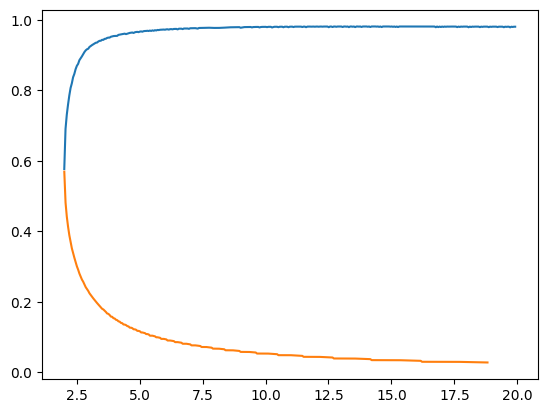

In [160]:
plt.plot(K_over,R_over)
plt.plot(K_under,R_under)

In [2]:
from scipy.integrate import quad
import scipy.stats as SS
import numpy as np
import matplotlib.pyplot as plt
import parmap
import sympy as sym
import multiprocessing as mp
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0,dK_graph,Make_empirical_KR as KR,split_uo
import pandas as pd


In [3]:
cluster_size = ['c0', 'c1', 'c2', 'c3', 'c4','c5', 'c6', 'c7', 'c8', 'c9']
cluster_pvel = ['c0 phase vel', 'c1 phase vel','c2 phase vel', 'c3 phase vel', 'c4 phase vel', 'c5 phase vel','c6 phase vel', 'c7 phase vel', 'c8 phase vel', 'c9 phase vel']

In [4]:
name = 'normal'
df_f_cluster = pd.read_excel(f'N = 500 seed = 10 dt = 0.1 {name} cluster TLO.xlsm',index_col=[0,1])

In [5]:
from TO_sim.gen_Distribution import Normal,Quantile_Normal as Q_Normal
seed = 10
N = 500
theta_init,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega) - np.mean(omega)

In [6]:
def to_mdf(df,m):
    ms = df.reset_index().m.unique()
    re_df = df.reset_index()

    df_m = re_df[re_df.m == m]
    Ks = df_m.K.to_numpy()
    df_m = df_m.set_index('K')
    return df_m,Ks
def to_maxomega(x):
    if type(x)!= float:
        cluster = omega[np.array(list(map(int,x.split(' '))))] 
        cluster -= np.mean(cluster)
        return np.max(abs(cluster))
    else: return np.nan

In [7]:

def get_omega(x):
    if np.isnan(x):
        return np.nan
    else: return omega[omega>0][int(x//2)]
def to_mdf(df,m):
    ms = df.reset_index().m.unique()
    re_df = df.reset_index()

    df_m = re_df[re_df.m == m]
    Ks = df_m.K.to_numpy()
    df_m = df_m.set_index('K')
    return df_m,Ks

In [8]:
D,U = KR0(6,1)
KF,RF,KB,RB= KR(6)
F = KF,RF
B = KB,RB
F_new = dK_graph(F,0.05)
BU,BO = split_uo(*B)

In [9]:
# K_backs = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
K_backs = [3,4,5,6,10,15]
df_b_dick = {}
for K_back in  K_backs:
    df_b_dick[K_back] = pd.read_excel(f'N = 500 seed = 10 dt = 0.1 {name} {K_back}-0 TLO.xlsm',index_col=[0,1])
    
tab_color_list = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray']
df = pd.read_excel(f'N = 500 seed = 10 dt = 0.1 {name} TLO.xlsm',index_col=[0,1])
# df_b2 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 4-0 TLO.xlsm',index_col=[0,1])
# df_b2 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 4-0 TLO.xlsm',index_col=[0,1])
# df_b3 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 5-0 TLO.xlsm',index_col=[0,1])
# df_b4 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 6-0 TLO.xlsm',index_col=[0,1])
# df_b5 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 10-0 TLO.xlsm',index_col=[0,1])
# df_b6 = pd.read_excel('N = 500 seed = 10 dt = 0.1 win 15-0 TLO.xlsm',index_col=[0,1])
# df_bs_K = [3,4,5,6,10,15]


In [376]:
df

r      rmin      rmax      rstd       rMM  error     c0  \
K    m                                                                      
0.0  0.0   0.037697  0.001322  0.125814  0.020086  0.124491    NaN    NaN   
     0.1   0.037688  0.001322  0.125814  0.020075  0.124491    NaN    NaN   
     0.2   0.037678  0.001322  0.125814  0.020063  0.124491    NaN    NaN   
     0.3   0.037667  0.001322  0.125814  0.020051  0.124491    NaN    NaN   
     0.4   0.037657  0.001322  0.125814  0.020039  0.124491    NaN    NaN   
...             ...       ...       ...       ...       ...    ...    ...   
15.0 9.6   0.864003  0.789531  0.956874  0.034413  0.167342    NaN  445.0   
     9.7   0.874574  0.813779  0.952315  0.029131  0.138535    NaN  449.0   
     9.8   0.880083  0.823234  0.956273  0.027099  0.133040    NaN  451.0   
     9.9   0.854412  0.782814  0.946849  0.039547  0.164035    NaN  441.0   
     10.0  0.886062  0.829149  0.954689  0.024794  0.125540    NaN  453.0   

             c1   c2   c3  ...  c0 omega  c1 omega  c2 omega  c3 omega  \
K    m                     ...                                           
0.0  0.0    NaN  NaN  NaN  ...       NaN       NaN       NaN       NaN   
     0.1    NaN  NaN  NaN  ...       NaN       NaN       NaN       NaN   
     0.2    NaN  NaN  NaN  ...       NaN       NaN       NaN       NaN   
     0.3    NaN  NaN  NaN  ...       NaN       NaN       NaN       NaN   
     0.4    NaN  NaN  NaN  ...       NaN       NaN       NaN       NaN   
...         ...  ...  ...  ...       ...       ...       ...       ...   
15.0 9.6   19.0  7.0  NaN  ...  0.050515 -1.627761  2.361086       NaN   
     9.7   14.0  8.0  8.0  ... -0.009811 -1.653932  1.653544 -1.999117   
     9.8   14.0  8.0  7.0  ... -0.010700 -1.653932 -1.999117  2.361086   
     9.9   21.0  NaN  NaN  ...  0.050202 -1.618851       NaN       NaN   
     10.0  10.0  7.0  NaN  ...  0.008469 -1.705784  2.361086       NaN   

           c4 omega  c5 omega  c6 omega  c7 omega  c8 omega  c9 omega  
K    m                                                                 
0.0  0.0        NaN       NaN       NaN       NaN       NaN       NaN  
     0.1        NaN       NaN       NaN       NaN       NaN       NaN  
     0.2        NaN       NaN       NaN       NaN       NaN       NaN  
     0.3        NaN       NaN       NaN       NaN       NaN       NaN  
     0.4        NaN       NaN       NaN       NaN       NaN       NaN  
...             ...       ...       ...       ...       ...       ...  
15.0 9.6        NaN       NaN       NaN       NaN       NaN       NaN  
     9.7        NaN       NaN       NaN       NaN       NaN       NaN  
     9.8        NaN       NaN       NaN       NaN       NaN       NaN  
     9.9        NaN       NaN       NaN       NaN       NaN       NaN  
     10.0       NaN       NaN       NaN       NaN       NaN       NaN  

[15251 rows x 36 columns]

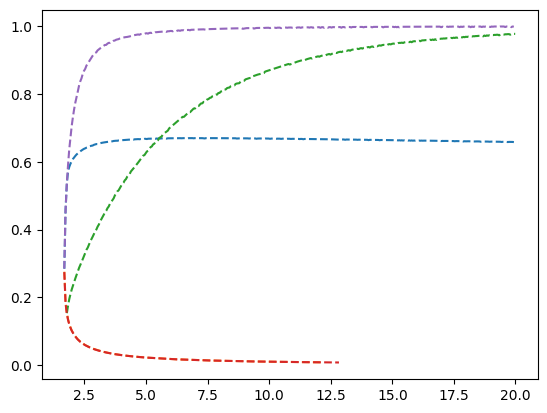

In [377]:
plt.plot(*U,'--')
plt.plot(*D,'--')

plt.plot(*F_new,'--')
plt.plot(*BU,'--')
plt.plot(*BO,'--')

In [378]:
K_backs

[3, 4, 5, 6, 10, 15]

In [379]:
Ks

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

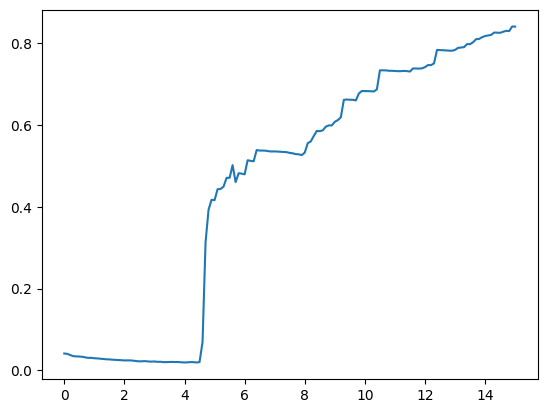

In [380]:
plt.plot(K_rs)

In [381]:
(K_rs*Ks)

K
0.0      0.000000
0.1      0.004011
0.2      0.007422
0.3      0.010331
0.4      0.013580
          ...    
14.6    12.098128
14.7    12.213379
14.8    12.287249
14.9    12.538348
15.0    12.617331
Name: r, Length: 151, dtype: float64

In [382]:
m_to_draw = 10
df_6,Ks = to_mdf(df,m_to_draw)
K_rs = df_6.r
O_p = lambda Kr,m: (4/np.pi)*np.sqrt(Kr/m)
O_ps = (K_rs*Ks).apply(O_p,m=m_to_draw)

df_m_cluster,Ks = to_mdf(df_f_cluster,m_to_draw)
df_m_r,Ks = to_mdf(df,m_to_draw)
max_o = df_m_cluster['c0 list'].apply(to_maxomega)

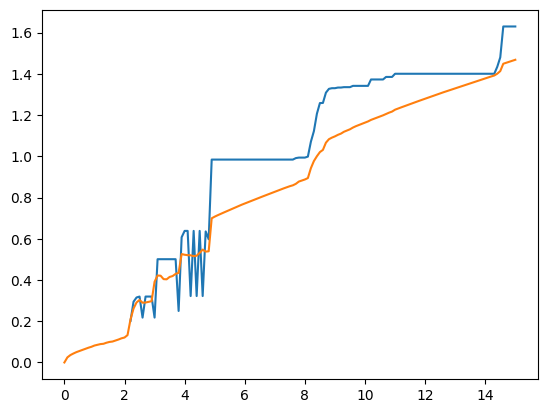

In [383]:
plt.plot(Ks,max_o)
plt.plot(Ks,O_ps)

In [384]:
max_o.loc[K]

1.6293881998873136

In [385]:
df_m_cluster,Ks = to_mdf(df_f_cluster,m_to_draw)
df_m_r,Ks = to_mdf(df,m_to_draw)
dtheta_col = [i for i in df_m_cluster.columns if ('dtheta' in i) and ('avg_dtheta' not in i)]
max_o = df_m_cluster['c0 list'].apply(to_maxomega)
D_sets = {}
U_sets = {}
for K in K_backs:
    O = max_o.loc[K]
    if ~np.isnan(O):
        D,U = KR0(m_to_draw,O)
        D_sets[K] = D
        U_sets[K] = U
    else:
        D_sets[K] = np.nan,np.nan
        U_sets[K] = np.nan,np.nan

In [386]:
O_ps.loc[K]

1.4678710876087822

In [387]:
O_ps.loc[K_backs]

K
3.0     0.391474
4.0     0.522418
5.0     0.707149
6.0     0.770958
10.0    1.163241
15.0    1.467871
Name: r, dtype: float64

In [388]:
D_sets_op = {}
U_sets_op = {}
for K in K_backs:
    O = O_ps.loc[K]
    O_ = max_o.loc[K]
    if ~np.isnan(O_):
        D,U = KR0(m_to_draw,O)
        D_sets_op[K] = D
        U_sets_op[K] = U
    else:
        D_sets_op[K] = np.nan,np.nan
        U_sets_op[K] = np.nan,np.nan


In [389]:
KF,RF,KB,RB= KR(m_to_draw)
F = KF,RF
B = KB,RB
F_new = dK_graph(F,0.05)
BU,BO = split_uo(*B)

In [390]:
def KR_underK(set,K):
    Ks,Rs = set
    K_ = Ks[Ks<K] 
    R_ = Rs[Ks<K] 
    return (K_,R_)

In [391]:
len(Ku)

367

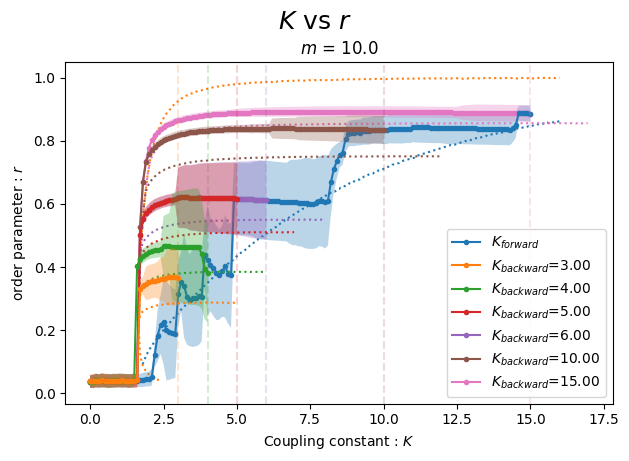

In [394]:
ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
plt.plot(Ks,rs,'.-',label=r'$K_{forward}$')
plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3)

    
num = len(df_b_dick)
num_c = 1
for K_back,df_b in df_b_dick.items():

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()

    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
    plt.plot(Ks,rs,'.-',zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
    Ku,Ru = U_sets_op[K_back]
    if type(Ku)== float:
        plt.plot(Ku,Ru,':',color = tab_color_list[num_c],zorder= num)
    else: 
        Ku_ = Ku[Ku<K_back+2] 
        Ru_ = Ru[Ku<K_back+2] 
        plt.plot(Ku_,Ru_,':',color = tab_color_list[num_c],zorder= num)
    plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3,zorder= num)
    num -=1
    num_c +=1
plt.legend()


# plt.grid()
plt.plot(*KR_underK(F_new,16),':',color ='tab:blue',zorder=0)
plt.plot(*KR_underK(BU,16),':',color = 'tab:orange',zorder=0)
plt.plot(*KR_underK(BO,16),':',color = 'tab:orange',zorder=0)
plt.title(f'$m$ = {m_to_draw:.01f}')
plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
plt.ylabel(r'order parameter : $r$')
plt.xlabel(r'Coupling constant : $K$')
plt.tight_layout()


In [134]:
100//2

50

In [138]:
omega[omega>0][N//2]

2.3539573425918947

In [140]:
np.isnan(np.NAN)

True

In [142]:


df['c0'].apply(get_omega)

K     m   
0.0   0.0          NaN
      0.1          NaN
      0.2          NaN
      0.3          NaN
      0.4          NaN
                ...   
15.0  9.6     1.431701
      9.7     1.416156
      9.8     1.352222
      9.9     1.352222
      10.0    1.352222
Name: c0, Length: 15251, dtype: float64

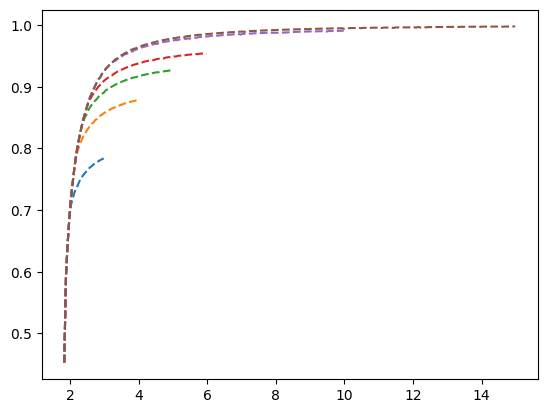

In [71]:
# for K_back,df_b in df_b_dick.items():
#         Ku,Ru = U_sets[K_back]
#         Ku_ = Ku[Ku<K_back] 
#         Ru_ = Ru[Ku<K_back] 
#         plt.plot(Ku_,Ru_,'--')


for K_back,df_b in df_b_dick.items():
        Ku,Ru = U_sets_op[K_back]
        Ku_ = Ku[Ku<K_back] 
        Ru_ = Ru[Ku<K_back] 
        plt.plot(Ku_,Ru_,'--')

## K vs cluster mean phase velocity

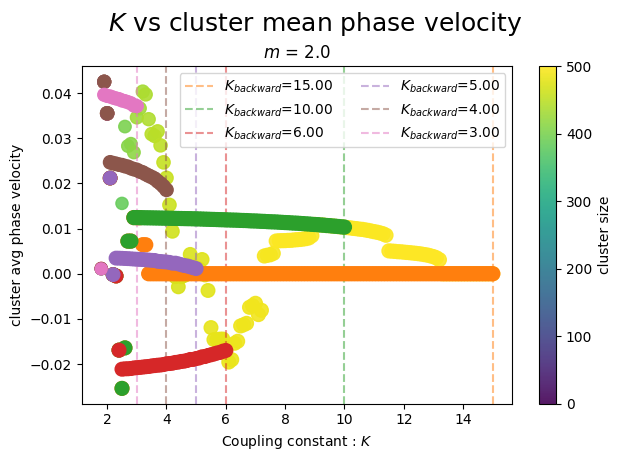

In [258]:
m_to_draw =2


ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw].set_index('K')
Ks = df_m.index.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
cluster_s = df_m.loc[:,cluster_size]
cluster_o = df_m.loc[:,cluster_pvel]
sca = plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.9,
            s=cluster_s.to_numpy().T*0.2,vmax=500,vmin=0)
    
num = 5
num_c = 0
for K_back,df_b in [*df_b_dick.items()][::-1]:
    num +=1
    num_c +=1

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()

    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    cluster_s = df_m.loc[:,cluster_size]
    cluster_o = df_m.loc[:,cluster_pvel]
    plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.5,label=r'$K_{backward}$='+f'{K_back:.02f}')   
    plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy().T),c=tab_color_list[num_c],alpha=1,
                s=cluster_s.to_numpy().T*0.2,zorder=num)
            
cbar = plt.colorbar(sca)
cbar.set_label('cluster size')

plt.legend(ncol =2)
plt.title(f'$m$ = {m_to_draw:.01f}')
plt.suptitle(r'$K$ vs cluster mean phase velocity', fontsize =18,y=0.95)
plt.ylabel(r'cluster avg phase velocity')
plt.xlabel(r'Coupling constant : $K$')
plt.tight_layout()

Text(0.5, 0, 'Coupling constant : $K$')

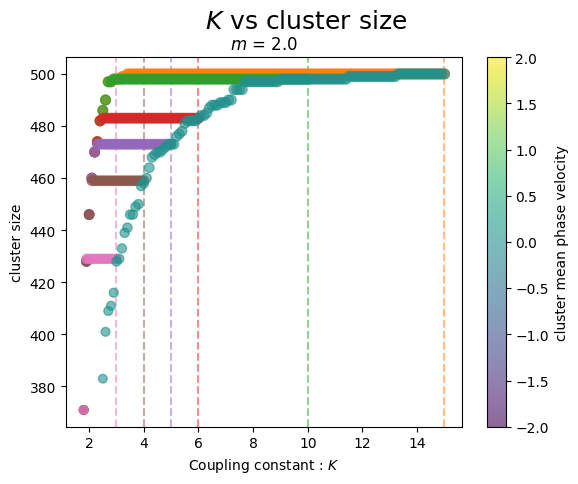

In [259]:
m_to_draw =2

ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
cluster_s = df_m.loc[:,cluster_size]
cluster_o = df_m.loc[:,cluster_pvel]
sca= plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_s.to_numpy().T),c=cluster_o.to_numpy().T,alpha=0.6,
            s=cluster_s.to_numpy().T*0.1,vmax=2,vmin=-2,zorder=12)
    
num = 5
num_c = 0

for K_back,df_b in [*df_b_dick.items()][::-1]:
    num +=1
    num_c +=1

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()

    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    cluster_s = df_m.loc[:,cluster_size]
    cluster_o = df_m.loc[:,cluster_pvel]
    plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.5)   
    plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_s.to_numpy().T),c=tab_color_list[num_c],alpha=0.7,
                s=cluster_s.to_numpy().T*0.1,zorder=num)
    

cbar = plt.colorbar(sca)
cbar.set_label('cluster mean phase velocity')
plt.suptitle(r'$K$ vs cluster size', fontsize =18)
plt.title(f'$m$ = {m_to_draw:.01f}')
plt.ylabel(r'cluster size')
plt.xlabel(r'Coupling constant : $K$')

### visualization

In [341]:
df_new001 = pd.read_excel('N = 500 seed = 10 test dt = 0.01 230708 ver3.xlsm',index_col=[0,1])
df_new01 = pd.read_excel('N = 500 seed = 10 test dt = 0.1 230708 ver3.xlsm',index_col=[0,1])
df_TLO = pd.read_excel('N = 500 seed = 10 dt = 0.1 win TLO.xlsm',index_col=[0,1])


cluster_size = ['c0', 'c1', 'c2', 'c3', 'c4',
       'c5', 'c6', 'c7', 'c8', 'c9']
cluster_pvel = ['c0 phase vel', 'c1 phase vel',
       'c2 phase vel', 'c3 phase vel', 'c4 phase vel', 'c5 phase vel',
       'c6 phase vel', 'c7 phase vel', 'c8 phase vel', 'c9 phase vel']

In [343]:
K_backs = [3,4,5,6,10,15]
df_b_dick = {}
for K_back in  K_backs:
    df_b_dick[K_back] = pd.read_excel(f'N = 500 seed = 10 dt = 0.1 win {K_back}-0 TLO.xlsm',index_col=[0,1])
    
tab_color_list = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray']

In [342]:
df_TLO = df_TLO.reset_index().query('K <10.1').set_index(['K','m'])

15


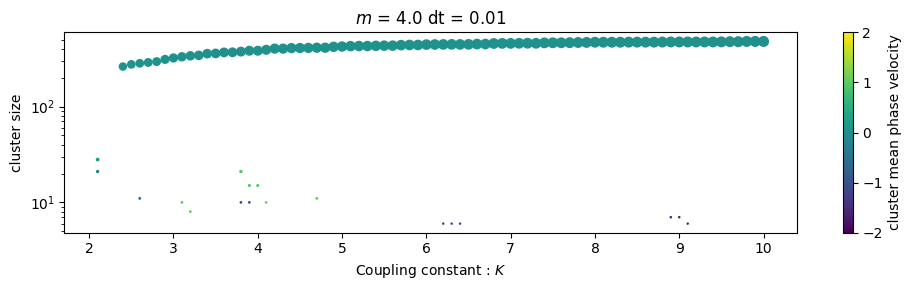

In [ ]:
m_to_draw = 4
plt.figure(figsize= (10,3))
ms = df_new001.reset_index().m.unique()
re_df = df_new001.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
cluster_s = df_m.loc[:,cluster_size]
cluster_o = df_m.loc[:,cluster_pvel]
print(len(cluster_s['c1'].dropna()))
# plt.scatter(np.ones((10,151))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
#             s=50*np.ones((10,151))*rstd)
sca = plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_s.to_numpy().T),c=cluster_o.to_numpy().T,alpha=1,
            s=cluster_s.to_numpy().T*0.1,vmax=2,vmin=-2,zorder=1)

plt.yscale('log')
cbar = plt.colorbar(sca)
cbar.set_label('cluster mean phase velocity')
plt.title(f'$m$ = {m_to_draw:.01f} dt = 0.01')
plt.ylabel(r'cluster size')
plt.xlabel(r'Coupling constant : $K$')
plt.tight_layout()

2
1


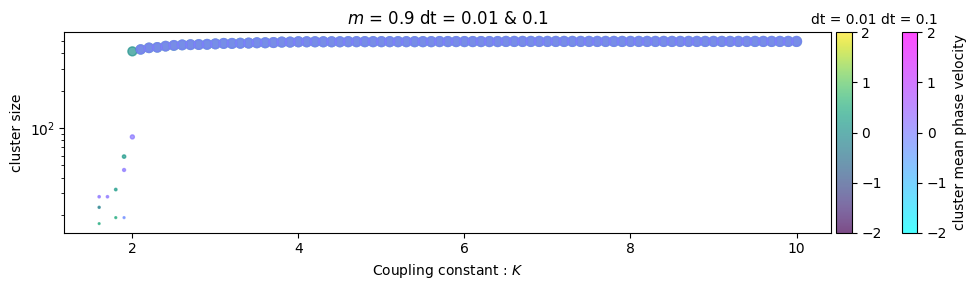

In [ ]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

m_to_draw = 0.90
fig = plt.figure(figsize= (10,3))
ms = df_new001.reset_index().m.unique()
re_df = df_new001.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
cluster_s = df_m.loc[:,cluster_size]
cluster_o = df_m.loc[:,cluster_pvel]
print(len(cluster_s['c1'].dropna()))
# plt.scatter(np.ones((10,151))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
#             s=50*np.ones((10,151))*rstd)
sca001 = plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_s.to_numpy().T),c=cluster_o.to_numpy().T,alpha=0.7,
            s=cluster_s.to_numpy().T*0.1,vmax=2,vmin=-2,zorder=3)


ms = df_new01.reset_index().m.unique()
re_df = df_new01.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
cluster_s = df_m.loc[:,cluster_size]
cluster_o = df_m.loc[:,cluster_pvel]
print(len(cluster_s['c1'].dropna()))
# plt.scatter(np.ones((10,151))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
#             s=50*np.ones((10,151))*rstd)
sca01 = plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_s.to_numpy().T),c=cluster_o.to_numpy().T,alpha=0.7,
            s=cluster_s.to_numpy().T*0.1,vmax=2,vmin=-2,zorder=3,cmap='cool')
    
plt.title(f'$m$ = {m_to_draw:.01f} dt = 0.01 & 0.1')
plt.ylabel(r'cluster size')
plt.xlabel(r'Coupling constant : $K$')
plt.yscale('log')

ax = plt.gca()
div = make_axes_locatable(ax)
cax001 = div.append_axes("right", size="2%", pad=0.05)
cax01 = div.append_axes("right", size="2%", pad=0.5)
cbar001 = plt.colorbar(sca001, cax=cax001)     
cbar01 = plt.colorbar(sca01, cax=cax01)     

cbar01.set_label('cluster mean phase velocity')
cax01.set_title(f'dt = 0.1',fontsize=10)
cax001.set_title(f'dt = 0.01',fontsize=10)
fig.tight_layout()
# cbar001.set_title(f'dt = 0.01')



### **TLO and not TLO**

In [ ]:
m_to_draw = 10

ms = df_new01.reset_index().m.unique()
re_df = df_new01.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
cluster_s = df_m.loc[:,cluster_size]
cluster_o = df_m.loc[:,cluster_pvel]


ms = df_TLO.reset_index().m.unique()
re_df = df_TLO.reset_index()

df_m_TLO = re_df[re_df.m == m_to_draw]
Ks_TLO = df_m_TLO.K.to_numpy()

In [367]:
co1 = ('#FF3B62','#BF2C49','#E63558')
co2 = ('#FF4229','#BF311F','#E63B25')
co3 = ('#FF7D2C','#BF5D21','#E67027') 
co4 = ('#FFC919','#BF9713','#E6B416')
co5 = ('#E4FF33','#ABBF26','#CCE62D')
co6 = ('#71FF4A','#55BF37','#66E543')
cos = [co1,co2,co3,co4,co5,co6]
co_dict = {}
for K,co in zip(K_backs,cos):
    co_dict[K] = co

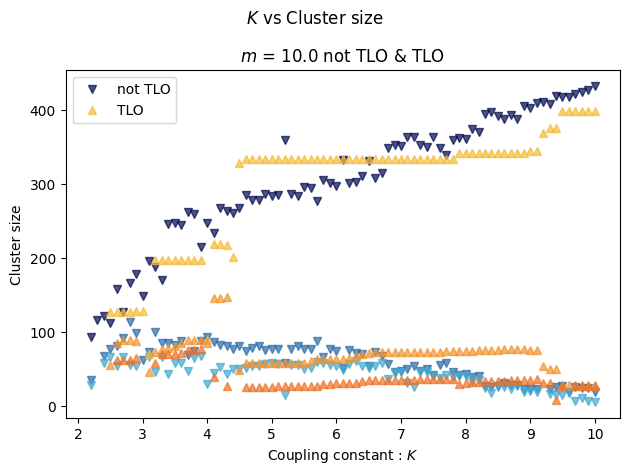

In [ ]:
plt.plot(Ks,df_m['c0'],'v',color = '#010c50',alpha=0.7,label = 'not TLO',zorder=1)
plt.plot(Ks,df_m['c1'],'v',color = '#296ba8',alpha=0.7,zorder=1)
plt.plot(Ks,df_m['c2'],'v',color = '#42a8cf',alpha=0.7,zorder=1)


plt.plot(Ks_TLO,df_m_TLO['c0'],'^',color = '#f6bb37',alpha=0.7,label = 'TLO',zorder=2)
plt.plot(Ks_TLO,df_m_TLO['c1'],'^',color = '#f1942e',alpha=0.7,zorder=2)
plt.plot(Ks_TLO,df_m_TLO['c2'],'^',color = '#ed7227',alpha=0.7,zorder=2)
plt.legend()
plt.title(f'$m$ = {m_to_draw:.01f} not TLO & TLO')
plt.suptitle('$K$ vs Cluster size')

plt.ylabel(r'Cluster size')
plt.xlabel(r'Coupling constant : $K$')
plt.tight_layout()

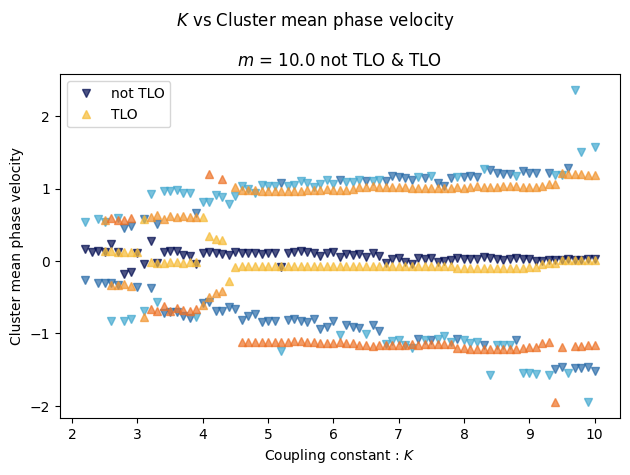

In [ ]:
plt.plot(Ks,df_m['c0 phase vel'],'v',color = '#010c50',alpha=0.7,label = 'not TLO',zorder=1)
plt.plot(Ks,df_m['c1 phase vel'],'v',color = '#296ba8',alpha=0.7,zorder=1)
plt.plot(Ks,df_m['c2 phase vel'],'v',color = '#42a8cf',alpha=0.7,zorder=1)


plt.plot(Ks_TLO,df_m_TLO['c0 phase vel'],'^',color = '#f6bb37',alpha=0.7,label = 'TLO',zorder=2)
plt.plot(Ks_TLO,df_m_TLO['c1 phase vel'],'^',color = '#f1942e',alpha=0.7,zorder=2)
plt.plot(Ks_TLO,df_m_TLO['c2 phase vel'],'^',color = '#ed7227',alpha=0.7,zorder=2)

plt.legend()
plt.title(f'$m$ = {m_to_draw:.01f} not TLO & TLO')
plt.suptitle('$K$ vs Cluster mean phase velocity')

plt.ylabel(r'Cluster mean phase velocity')
plt.xlabel(r'Coupling constant : $K$')
plt.tight_layout()

77
74


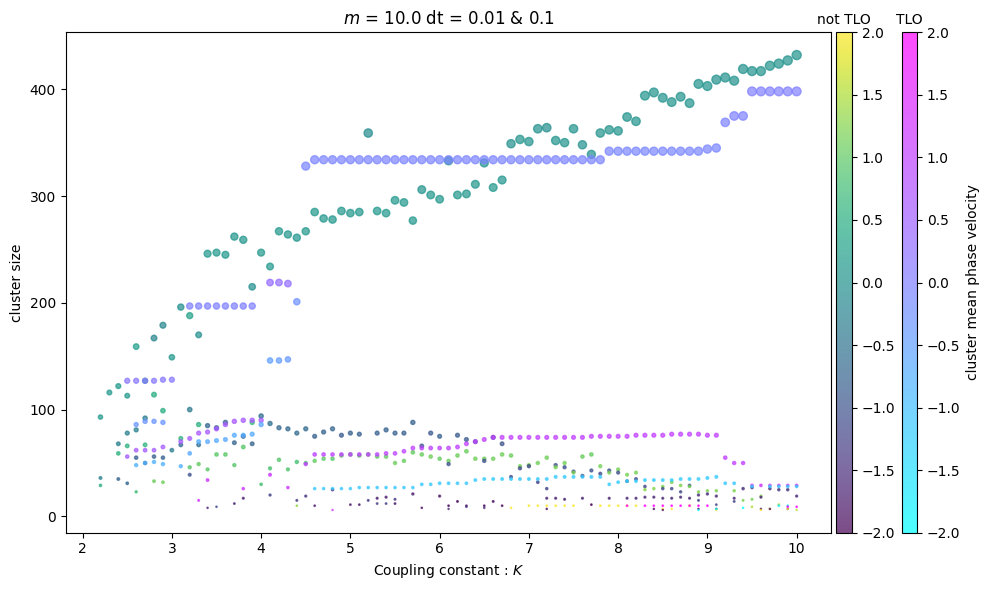

In [ ]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

m_to_draw = 10
fig = plt.figure(figsize= (10,6))
ms = df_new01.reset_index().m.unique()
re_df = df_new01.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
cluster_s = df_m.loc[:,cluster_size]
cluster_o = df_m.loc[:,cluster_pvel]
print(len(cluster_s['c1'].dropna()))
# plt.scatter(np.ones((10,151))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
#             s=50*np.ones((10,151))*rstd)
sca01 = plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_s.to_numpy().T),c=cluster_o.to_numpy().T,alpha=0.7,
            s=cluster_s.to_numpy().T*0.1,vmax=2,vmin=-2,zorder=3)


ms = df_TLO.reset_index().m.unique()
re_df = df_TLO.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
cluster_s = df_m.loc[:,cluster_size]
cluster_o = df_m.loc[:,cluster_pvel]
print(len(cluster_s['c1'].dropna()))
# plt.scatter(np.ones((10,151))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
#             s=50*np.ones((10,151))*rstd)
scaTLO = plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_s.to_numpy().T),c=cluster_o.to_numpy().T,alpha=0.7,
            s=cluster_s.to_numpy().T*0.1,vmax=2,vmin=-2,zorder=3,cmap='cool')
    
plt.title(f'$m$ = {m_to_draw:.01f} dt = 0.01 & 0.1')
plt.ylabel(r'cluster size')
plt.xlabel(r'Coupling constant : $K$')
# plt.yscale('log')

ax = plt.gca()
div = make_axes_locatable(ax)
cax01 = div.append_axes("right", size="2%", pad=0.05)
caxTLO = div.append_axes("right", size="2%", pad=0.5)
cbar01 = plt.colorbar(sca01, cax=cax01)     
cbarTLO = plt.colorbar(scaTLO, cax=caxTLO)     

cbarTLO.set_label('cluster mean phase velocity')
cax01.set_title(f'not TLO',fontsize=10)
caxTLO.set_title(f'TLO',fontsize=10)
fig.tight_layout()
# cbar001.set_title(f'dt = 0.01')



61
62


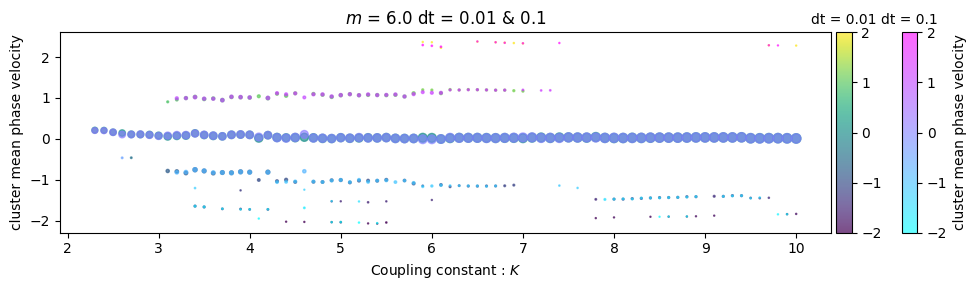

In [ ]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

m_to_draw = 6
fig = plt.figure(figsize= (10,3))
ms = df_new001.reset_index().m.unique()
re_df = df_new001.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
cluster_s = df_m.loc[:,cluster_size]
cluster_o = df_m.loc[:,cluster_pvel]
print(len(cluster_s['c1'].dropna()))
# plt.scatter(np.ones((10,151))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
#             s=50*np.ones((10,151))*rstd)
sca001 = plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy().T),c=cluster_o.to_numpy().T,alpha=0.7,
            s=cluster_s.to_numpy().T*0.1,vmax=2,vmin=-2,zorder=3)


ms = df_new01.reset_index().m.unique()
re_df = df_new01.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
cluster_s = df_m.loc[:,cluster_size]
cluster_o = df_m.loc[:,cluster_pvel]
print(len(cluster_s['c1'].dropna()))
# plt.scatter(np.ones((10,151))*Ks,(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.5,
#             s=50*np.ones((10,151))*rstd)
sca01 = plt.scatter(np.ones((10,len(Ks)))*Ks,(cluster_o.to_numpy().T),c=cluster_o.to_numpy().T,alpha=0.6,
            s=cluster_s.to_numpy().T*0.1,vmax=2,vmin=-2,zorder=3,cmap='cool')
    
plt.title(f'$m$ = {m_to_draw:.01f} dt = 0.01 & 0.1')
plt.ylabel(r'cluster mean phase velocity')
plt.xlabel(r'Coupling constant : $K$')

ax = plt.gca()
div = make_axes_locatable(ax)
cax001 = div.append_axes("right", size="2%", pad=0.05)
cax01 = div.append_axes("right", size="2%", pad=0.5)
cbar001 = plt.colorbar(sca001, cax=cax001)     
cbar01 = plt.colorbar(sca01, cax=cax01)     

cbar01.set_label('cluster mean phase velocity')
cax01.set_title(f'dt = 0.1',fontsize=10)
cax001.set_title(f'dt = 0.01',fontsize=10)
fig.tight_layout()
# cbar001.set_title(f'dt = 0.01')



## TLO Foward and Backward process

In [10]:
df_TLO = pd.read_excel(f'N = 500 seed = 10 dt = 0.1 {name} TLO.xlsm',index_col=[0,1])

In [11]:
co1 = ('#FF3B62','#BF2C49','#E63558')
co2 = ('#FF4229','#BF311F','#E63B25')
co3 = ('#FF7D2C','#BF5D21','#E67027') 
co4 = ('#FFC919','#BF9713','#E6B416')
co5 = ('#E4FF33','#ABBF26','#CCE62D')
co6 = ('#71FF4A','#55BF37','#66E543')
cos = [co1,co2,co3,co4,co5,co6]
co_dict = {}
for K,co in zip(K_backs,cos):
    co_dict[K] = co

In [12]:
m_to_draw = 6
K_back = 5

ms = df_TLO.reset_index().m.unique()
re_df = df_TLO.reset_index()

df_m_TLO = re_df[re_df.m == m_to_draw]
Ks_TLO = df_m_TLO.K.to_numpy()


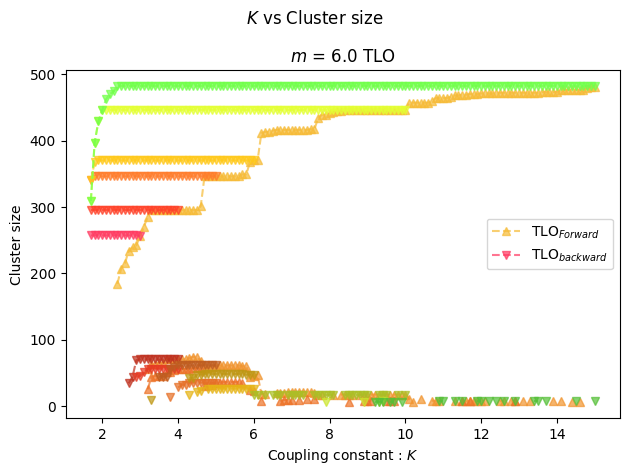

In [14]:


plt.plot(Ks_TLO,df_m_TLO['c0'],'^--',color = '#f6bb37',alpha=0.7,label = r'TLO$_{Forward}$',zorder=2)
plt.plot(Ks_TLO,df_m_TLO['c1'],'^--',color = '#f1942e',alpha=0.7,zorder=2)
plt.plot(Ks_TLO,df_m_TLO['c2'],'^--',color = '#ed7227',alpha=0.7,zorder=2)
num = 0
for K_back in K_backs:
    A,B,C = co_dict[K_back]
    ms = df_b_dick[K_back].reset_index().m.unique()
    re_df = df_b_dick[K_back].reset_index()

    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    if num == 0:
        num +=1
        plt.plot(Ks,df_m['c0'],'v--',color = A,alpha=0.7,label = r'TLO$_{backward}$',zorder=3)
    else: 
        plt.plot(Ks,df_m['c0'],'v--',color = A,alpha=0.7,zorder=3)
    plt.plot(Ks,df_m['c1'],'v--',color = B,alpha=0.7,zorder=3)
    plt.plot(Ks,df_m['c2'],'v--',color = C,alpha=0.7,zorder=3)
plt.legend()
plt.title(f'$m$ = {m_to_draw:.01f} TLO')
plt.suptitle('$K$ vs Cluster size')

plt.ylabel(r'Cluster size')
plt.xlabel(r'Coupling constant : $K$')
plt.tight_layout()